# Anomaly Detection and Recommender Systems 
# 异常检测和推荐系统

In [1]:
import scipy.io as sio
data = sio.loadmat('ex8data1.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [2]:
X = data['X']
Xval = data['Xval']
yval = data['yval']
print X.shape
print Xval.shape
print yval.shape

(307, 2)
(307, 2)
(307, 1)


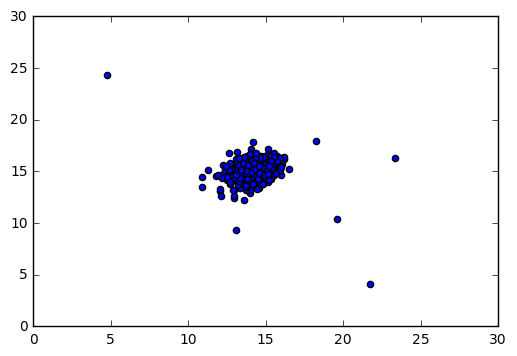

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X[:, 0], X[:, 1])
plt.axis([0, 30, 0, 30])
plt.show()

In [9]:
def estimateGaussian(X):
    m, n = X.shape
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
#     for i in range(n):
#         mu[i] = 1.0 / m * np.sum(X[:, i])
#         sigma2[i] = 1.0 / m * np.sum((X[:, i] - mu[i])**2)
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    
    return mu, sigma2

In [10]:
estimateGaussian(X)

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

In [65]:
# sklearn one_class SVM
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
print X_train.shape

(200, 2)


In [66]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [67]:
clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [68]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

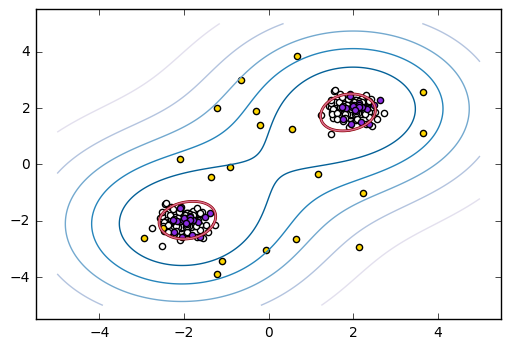

In [69]:
# s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

plt.show()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']
(307, 2)
(307, 2)
(307, 1)


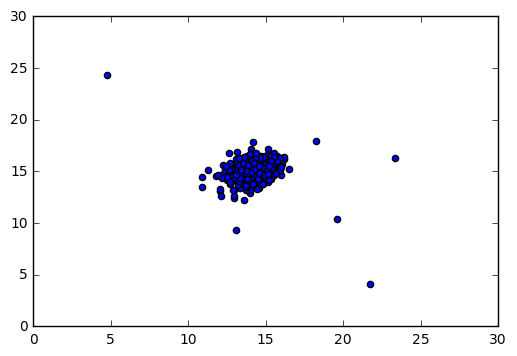

In [70]:
import scipy.io as sio
data = sio.loadmat('ex8data1.mat')
print data.keys()
X = data['X']
Xval = data['Xval']
yval = data['yval']
print X.shape
print Xval.shape
print yval.shape
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X[:, 0], X[:, 1])
plt.axis([0, 30, 0, 30])
plt.show()

In [71]:
from sklearn import svm
xx, yy = np.meshgrid(np.linspace(0, 30, 500), np.linspace(0, 30, 500))
clf = svm.OneClassSVM(nu=0.04, kernel='rbf', gamma=0.1)
clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.04, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [72]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

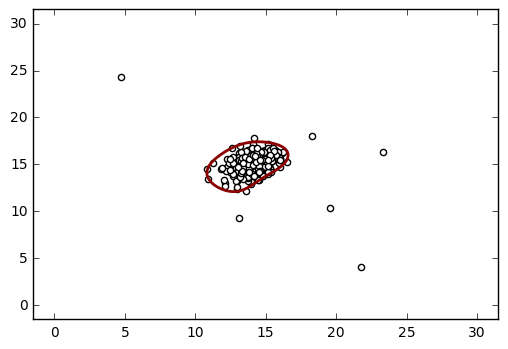

In [73]:
plt.scatter(X[:, 0], X[:, 1], c='white')
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

plt.show()
# 调节nu参数和gamma参数

In [84]:
pre_y = clf.predict(Xval)
print pre_y.shape
print yval.ravel().shape

(307,)
(307,)


In [90]:
np.mean(pre_y != yval) # 这个预测出来的0和1刚好反了一下

0.97211641502827617

## 正确率和召回率（叫查准率更好一点）
- 正确率 = 提取出的正确信息条数 /  提取出的信息条数     
- 召回率 = 提取出的正确信息条数 /  样本中的信息条数    
两者取值在0和1之间，数值越接近1，查准率或查全率就越高。   
- F值  = 正确率 * 召回率 * 2 / (正确率 + 召回率) （F 值即为正确率和召回率的调和平均值）

不妨举这样一个例子：某池塘有1400条鲤鱼，300只虾，300只鳖。现在以捕鲤鱼为目的。撒一大网，逮着了700条鲤鱼，200只虾，100只鳖。那么，这些指标分别如下：

正确率 = 700 / (700 + 200 + 100) = 70%

召回率 = 700 / 1400 = 50%

F值 = 70% * 50% * 2 / (70% + 50%) = 58.3%

不妨看看如果把池子里的所有的鲤鱼、虾和鳖都一网打尽，这些指标又有何变化：

正确率 = 1400 / (1400 + 300 + 300) = 70%

召回率 = 1400 / 1400 = 100%

F值 = 70% * 100% * 2 / (70% + 100%) = 82.35%

### 如果把上图中误差点检测出来并且去掉，则会提高 正确率和召回率以及F值

# 推荐系统（是一块很大的内容啊）

In [1]:
import scipy.io as sio
data = sio.loadmat('ex8_movies.mat')
print data.keys()

['Y', 'R', '__version__', '__header__', '__globals__']


In [4]:
R = data['R']
Y = data['Y']
print R.shape
print Y.shape
print R[0][0:20]
print Y[0][0:20]

(1682, 943)
(1682, 943)
[1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1]
[5 4 0 0 4 4 0 0 0 4 0 0 3 0 1 5 4 5 0 3]


In [10]:
import numpy as np
pos = np.where(R[0, :] == 1)
print np.mean(Y[0][pos])  # 计算第一个电影有人给了评价分数的平均值

3.87831858407


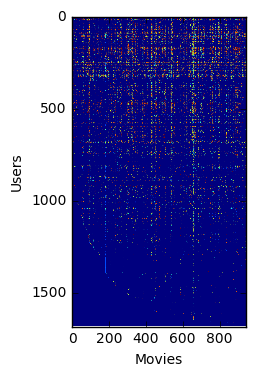

In [18]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(4, 4))
plt.imshow(Y)
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()

In [19]:
data_movieParams = sio.loadmat('ex8_movieParams.mat')
print data_movieParams.keys()

['num_features', '__header__', '__globals__', 'num_users', 'X', 'Theta', '__version__', 'num_movies']


In [24]:
num_features = data_movieParams['num_features']
num_users = data_movieParams['num_users']
num_movies = data_movieParams['num_movies']
X = data_movieParams['X']
Theta = data_movieParams['Theta']
print num_features
print num_users
print num_movies
print X.shape
print Theta.shape

[[10]]
[[943]]
[[1682]]
(1682, 10)
(943, 10)


In [26]:
num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]
print X
print Theta
print Y
print R

[[ 1.0486855  -0.40023196  1.19411945]
 [ 0.78085123 -0.38562591  0.52119779]
 [ 0.64150886 -0.54785385 -0.08379638]
 [ 0.45361782 -0.80021844  0.68048129]
 [ 0.93753789  0.1060899   0.36195295]]
[[ 0.28544362 -1.68426509  0.26293877]
 [ 0.50501321 -0.45464846  0.31746244]
 [-0.43191656 -0.47880449  0.84671111]
 [ 0.72859839 -0.27189391  0.3268436 ]]
[[5 4 0 0]
 [3 0 0 0]
 [4 0 0 0]
 [3 0 0 0]
 [3 0 0 0]]
[[1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


## 推荐系统，使用Python crab模块
发现from scikits.crab.recommenders.knn import UserBasedRecommender
模块无法导入，相关资料文档缺乏

In [38]:
from scikits.crab import datasets
movies = datasets.load_sample_movies()
songs = datasets.load_sample_songs()

In [39]:
print movies.data

{1: {1: 3.0, 2: 4.0, 3: 3.5, 4: 5.0, 5: 3.0}, 2: {1: 3.0, 2: 4.0, 3: 2.0, 4: 3.0, 5: 3.0, 6: 2.0}, 3: {2: 3.5, 3: 2.5, 4: 4.0, 5: 4.5, 6: 3.0}, 4: {1: 2.5, 2: 3.5, 3: 2.5, 4: 3.5, 5: 3.0, 6: 3.0}, 5: {2: 4.5, 3: 1.0, 4: 4.0}, 6: {1: 3.0, 2: 3.5, 3: 3.5, 4: 5.0, 5: 3.0, 6: 1.5}, 7: {1: 2.5, 2: 3.0, 4: 3.5, 5: 4.0}}


打印结果是一个字典。最外面的一层数字1-6是用户id。每个用户id对应了该用户所评分的对应，如：用户1，的第一部电影1对应的评分是3分。当然接下来我们可以打印出用户id列表和电影id列表，方便查看：

In [29]:
print movies.user_ids # 7个用户

{1: 'Jack Matthews', 2: 'Mick LaSalle', 3: 'Claudia Puig', 4: 'Lisa Rose', 5: 'Toby', 6: 'Gene Seymour', 7: 'Michael Phillips'}


In [30]:
print movies.item_ids # 6个电影

{1: 'Lady in the Water', 2: 'Snakes on a Planet', 3: 'You, Me and Dupree', 4: 'Superman Returns', 5: 'The Night Listener', 6: 'Just My Luck'}


In [31]:
# 建立movies模型
from scikits.crab.models import MatrixPreferenceDataModel
#Build the model
model = MatrixPreferenceDataModel(movies.data)

In [32]:
# 接下来，导入皮尔逊相关度和用户相似度，建立起相似度模型：
from scikits.crab.metrics import pearson_correlation
from scikits.crab.similarities import UserSimilarity
#Build the similarity
similarity = UserSimilarity(model, pearson_correlation)
# 这里基于用户模型的函数参数设置为：similarity = UserSimilarity(数据模型，相似度模型)

In [2]:
# # 最后，使用基于用户推荐的方法，就可以输出为用户5（Toby）的影片推荐了三部电影：
# # from scikits.crab.recommenders.knn import UserBasedRecommender
# from scikits.crab.recommenders.knn import UserBasedRecommender
# #Build the User based recommender
# recommender = UserBasedRecommender(model, similarity, with_preference=True)
# #Recommend items for the user 5 (Toby)
# recommender.recommend(5)

## 推荐系统，使用Python-recsys 解决不了数据导入问题，相关资料匮乏

In [1]:
# from recsys.algorithm.factorize import SVD
# svd = SVD()
# svd.load_data(filename='ml-latest-small/ratings.csv',
#             sep='::',
#             format={'col':0, 'row':1, 'value':2, 'ids': int})

In [5]:
import pandas as pd
data = pd.read_csv('ml-latest-small/ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
data.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [3]:
# k = 100
# svd.compute(k=k,
#             min_values=10,
#             pre_normalize=None,
#             mean_center=True,
#             post_normalize=True,
#             savefile='ml-latest-small/')

In [4]:
# from recsys.datamodel.data import Data
# data = Data()
# filename = 'ml-latest-small/ratings.dat'
# format = {'col':0, 'row':1, 'value':2, 'ids': 'int'}
# data.load(filename, sep='::', format=format)


# 用Python实现推荐系统
http://python.jobbole.com/85516/
两种最普遍的推荐系统的类型是基于内容和协同过滤（CF）。协同过滤基于用户对产品的态度产生推荐，也就是说，它使用“人群的智慧”来推荐产品。与此相反，基于内容的推荐系统集中于物品的属性，并基于它们之间的相似性为你推荐。一般情况下，协作过滤（CF）是推荐引擎的主力。该算法具有能够自身进行特征学习的一个非常有趣的特性，这意味着它可以开始学习使用哪些特性。CF可以分为基于内存的协同过滤和基于模型的协同过滤。使用奇异值分解（SVD）实现基于模型的CF和通过计算余弦相似实现基于内存的CF。

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv('ml-100k/u.data')
df.head()

,196 242 3 881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [13]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=header)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
n_users = df.user_id.unique()
print type(n_users) # 转化为numpy类型

<type 'numpy.ndarray'>


In [19]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print 'Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items)  

Number of users = 943 | Number of movies = 1682


In [22]:
# 切分数据为 测试集合训练集
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)
print type(train_data), type(test_data)
print train_data.head()
print test_data.head()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
       user_id  item_id  rating  timestamp
5979        16      447       5  877724066
52206      533      297       4  893160944
8863       264      436       3  886122352
63046      768      966       4  883834814
8695       234      328       2  891033772
       user_id  item_id  rating  timestamp
33654      401      655       3  891033417
33783      353      340       4  891401942
39363      436      595       5  887770731
25190       44      100       5  878341196
22266      446      748       2  879787149


## 基于内存的协同过滤
基于内存的协同过滤方法可以分为两个部分：用户－产品协同过滤和产品－产品协同过滤。用户－产品协同过滤将选取一个特定的用户，基于打分的相似性发现类似于该用户的用户，并推荐那些相似用户喜欢的产品。产品－产品协同过滤会选取一个产品，发现喜欢该产品的用户，并找到这些相似用户还喜欢的其它产品。

用户－产品协同过滤：“喜欢这东西的人也喜欢……”

产品－产品协同过滤：“像你一样的人也喜欢……”

在这两种情况下，从整个数据集构建一个用户产品矩阵。

用户产品矩阵的例子：

计算相似性，并创建一个相似性矩阵。

在产品－产品协同过滤中的产品之间的相似性是通过观察所有对两个产品打分的用户来度量的。

在用户－产品协同过滤中的用户之间的相似性是通过观察所有同时被两个用户打分的产品来度量的。

In [25]:
# 第一步是创建用户-产品矩阵。由于既有测试数据，又有训练数据，那么需要创建两个矩阵。
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
print train_data_matrix.shape
print test_data_matrix.shape

(943, 1682)
(943, 1682)


In [26]:
# 使用sklearn的pairwise_distances函数来计算余弦相似性。注意，输出范围从0到1，因为打分都是正的。
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')
print type(user_similarity), type(item_similarity)
print user_similarity.shape, item_similarity.shape

<type 'numpy.ndarray'> <type 'numpy.ndarray'>
(943, 943) (1682, 1682)


In [28]:
user_similarity[1,100] == user_similarity[100,1]

True

In [29]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [30]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [33]:
print item_prediction.shape
print user_prediction.shape

(943, 1682)
(943, 1682)


有许多评价指标，但其中最受欢迎的用来度量预测评分的准确性的指标是均方根误差 (RMSE)。
使用sklearn的mean_square_error (MSE)函数，其中，RMSE仅仅是MSE的平方根。使用sklearn的mean_square_error (MSE)函数，其中，RMSE仅仅是MSE的平方根。使用sklearn的mean_square_error (MSE)函数，其中，RMSE仅仅是MSE的平方根。

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [35]:
print 'User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix))
print 'Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix))

User-based CF RMSE: 3.1331018271
Item-based CF RMSE: 3.45889169686


基于内存的算法事很容易实现并产生合理的预测质量的。

基于内存的CF的缺点是，它不能扩展到真实世界的场景，并且没有解决众所周知的冷启动问题，也就是当新用户或新产品进入系统时。基于模型的CF方法是可扩展的，并且可以比基于内存的模型处理更高的稀疏度，但当没有任何评分的用户或产品进入系统时，也是苦不堪言的。

## 基于模型的协同过滤
基于模型的协同过滤是基于矩阵分解（MF），它已获得更大的曝光，它主要是作为潜变量分解和降维的一个无监督学习方法。矩阵分解广泛用于推荐系统，其中，它比基于内存的CF可以更好地处理与扩展性和稀疏性. MF的目标是从已知的评分中学习用户的潜在喜好和产品的潜在属性（学习描述评分特征的特征），随后通过用户和产品的潜在特征的点积预测未知的评分。

当你有一个非常稀疏的多维矩阵时，通过进行矩阵分解可以调整用户-产品矩阵为低等级的结构，然后你可以通过两个低秩矩阵（其中，每行包含该本征矢量）的乘积来代表该矩阵。你通过将低秩矩阵相乘，在原始矩阵填补缺少项，以调整这个矩阵，从而尽可能的近似原始矩阵。

In [37]:
# 计算MovieLens数据集的稀疏度
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print 'The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%'

The sparsity level of MovieLens100K is 93.7%


In [38]:
# SVD 矩阵分解
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

print 'User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix))

User-based CF MSE: 2.73072623012
